# Volumetric Behaviour of a Fluid from Intermolecular Interactions

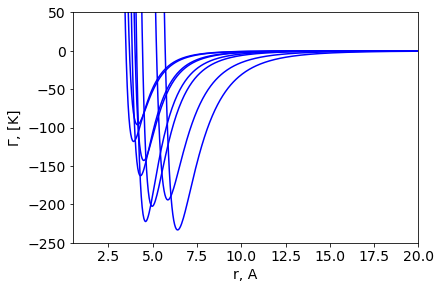

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

figure=plt.figure()
axes = figure.add_axes([0.1,0.1,0.8,0.8])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('r, A', fontsize=14);
axes.set_ylabel('$\Gamma$, [K]',fontsize=14);
axes.set_xlim([0.5,20]);
axes.set_ylim([-250,50]);

#Intermolecular Potential, i.e. LJ 6/12
#Species=[Ar, Kr, Xe, CH4, N2, C2H4, C2H6, C3H8]
SIGMA=[3.499, 3.846, 4.100, 4.010, 3.694, 4.433, 5.220, 5.711] # Angstrom
EPS=[118.13, 162.74, 222.32, 142.87, 96.26, 202.52, 194.14, 233.28] #K 

r = np.linspace(0.3, 25, 500)
Gamma=np.zeros((np.size(r),np.size(SIGMA)))


for i in np.arange(0,np.size(SIGMA)):
    sr6=np.power(np.divide(SIGMA[i],r),6)
    Gamma[:,i]=4*EPS[i]*(np.power(sr6,2)-sr6)
    
axes.plot(r,Gamma[:,:], marker=' ' , color='b');
    

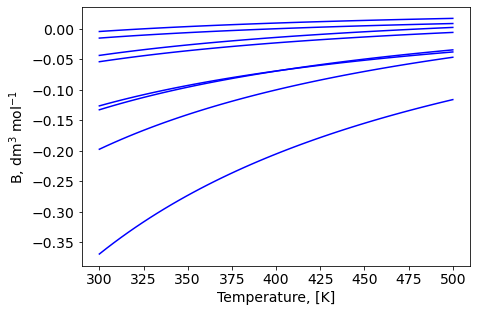

In [35]:
# Compute the second Virial coefficient as a function of T
Temperature = np.linspace(300, 500, 50)
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,0.9,0.9])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

axes.set_xlabel('Temperature, [K]', fontsize=14);
axes.set_ylabel('B, dm$^3$ mol$^{-1}$',fontsize=14);

B=np.zeros((np.size(Temperature),np.size(SIGMA)))

for i in np.arange(0,np.size(SIGMA)):
    for j in np.arange(0,np.size(Temperature)):
        B[j,i]=2*np.pi*6E23*np.trapz((1-np.exp(-Gamma[:,i]/Temperature[j]))*np.power(r*1E-9,2),r*1E-9)
    
axes.plot(Temperature,B, marker=' ' , color='b');


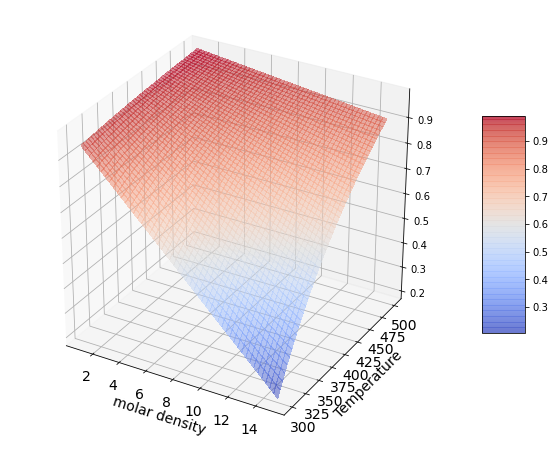

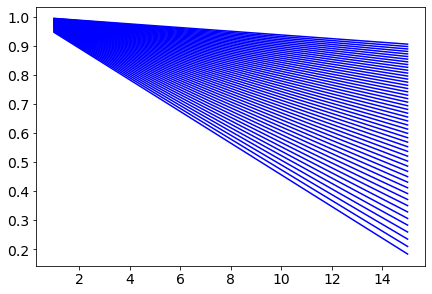

In [37]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

## Z Diagram

rho=np.linspace(1, 15, 50) # mol / l

rho_g, Temperature_g = np.meshgrid(rho, Temperature) 

Z=np.zeros((np.shape(rho_g)))

for i in np.arange(0,np.size(rho)):
    Z[:,i]=1+rho_g[:,i]*B[:,1]

figure=plt.figure(figsize=(10, 8))
#axes = figure.add_axes([0.1,0.1,0.1,1.2,1.2,1.2])
axes = figure.gca(projection ='3d') 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

surf=axes.plot_surface(rho_g,Temperature_g,Z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.5)

axes.set_xlabel('molar density', fontsize=14);
axes.set_ylabel('Temperature',fontsize=14);
figure.colorbar(surf, shrink=0.5, aspect=5);

figure=plt.figure()
axes = figure.add_axes([0.1,0.1,0.9,0.9])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in np.arange(0,np.size(Temperature)):
        axes.plot(rho,Z[i,:], marker=' ' , color='b');


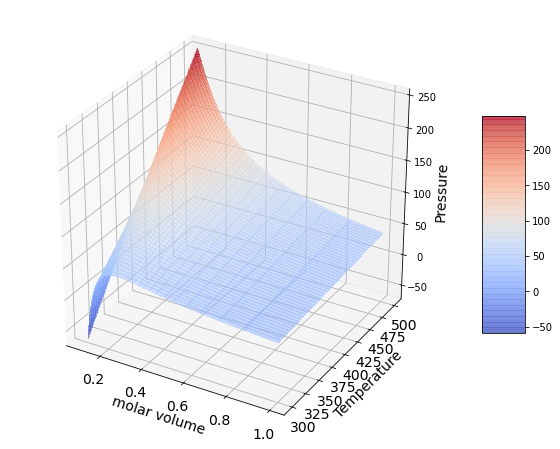

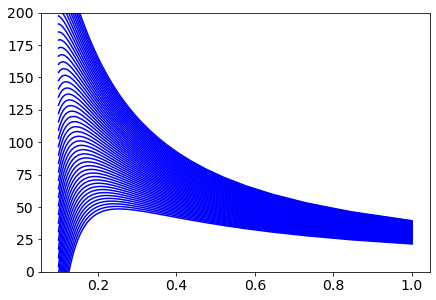

In [47]:
## P/v isotherms Diagram

rho=np.linspace(1, 10, 50) # mol / l

rho_g, Temperature_g = np.meshgrid(rho, Temperature) 

P=np.zeros((np.shape(rho_g)))

R=0.082;

for i in np.arange(0,np.size(rho)):
    P[:,i]=Temperature_g[:,i]*R*rho_g[:,i]+Temperature_g[:,i]*R*rho_g[:,i]*rho_g[:,i]*B[:,2]


figure=plt.figure(figsize=(10, 8))
#axes = figure.add_axes([0.1,0.1,0.1,1.2,1.2,1.2])
axes = figure.gca(projection ='3d') 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

surf=axes.plot_surface(1/rho_g,Temperature_g,P,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.5)

axes.set_xlabel('molar volume', fontsize=14);
axes.set_ylabel('Temperature',fontsize=14);
axes.set_zlabel('Pressure',fontsize=14);
figure.colorbar(surf, shrink=0.5, aspect=5);

figure=plt.figure()
axes = figure.add_axes([0.1,0.1,0.9,0.9])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in np.arange(0,np.size(Temperature)):
        axes.plot(1/rho,P[i,:], marker=' ' , color='b');


axes.set_ylim([0,200]);